In [1]:
## Import libraries & Packages

# Data structure and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import colorsys
import os
%matplotlib inline

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics

In [2]:
path = os.path.join('data', 'merged_data.csv')
total_df = pd.read_csv(path)

In [3]:
# define training, cross-validation and testing sets

Y = total_df['authenticity']
X = total_df['text'] 
X2 = total_df[['title', 'text','author', 'authenticity']]
X_train, X_cvt, Y_train, Y_cvt = train_test_split(X, Y, test_size=0.4, random_state=42)
X_cv, X_test, Y_cv, Y_test = train_test_split(X_cvt, Y_cvt, test_size=0.6, random_state=42)


In [28]:
X2_df = pd.DataFrame(X2)

X2_df['author'][X2_df.author == "[]"] = 1
X2_df['author'][X2_df.author != 1] = 0

X2_df['title_list'] = [list(x) for x in X2_df.title]
X2_df['text_list'] = [list(x) for x in X2_df.text]

X2_df['len_title'] = list(X2_df.title.str.len())
X2_df['len_text'] = list(X2_df.text.str.len())

avg_len_title = X2_df.len_title.mean()
avg_len_text = X2_df.len_text.mean()

punctuation_key = ['period', 'comma', 'exclamation', 'colon', 'semicolon','quotation','apostrophe','hyphen','parentheses']
punctuation_value = [["."], [','], ['!'], [':'],[';'],['"'],["'"], ["-","_"], ['(',')','{','}','[' ,']']]
punctuation_dict = dict(zip(punctuation_key, punctuation_value))

for key, value in punctuation_dict.items():
    X2_df["num_" + key] = X2_df['text_list'].apply(lambda x: sum(x.count(a) for a in value))

for x in punctuation_key:
    X2_df["rate_" + x] = (X2_df['num_'+ x]/X2_df['len_text'])/(X2_df['num_'+ x].mean()/avg_len_text)

X2_df["rate_exag_punctuation"] = X2_df['title_list'].apply(lambda x: sum(x.count(a) for a in ["!", "?", ":", '-'])) / X2_df['len_title']    
avg_rate_cap = X2_df["rate_exag_punctuation"].mean()
X2_df["rate_exag_punctuation"] /= avg_rate_cap    
    
X2_df['rate_cap'] = (X2_df['title_list'].apply(lambda x: len([a for a in x if a.isupper()])) / X2_df['len_title'])

X2_df['rate_len_title'] = X2_df['len_title']/avg_len_title


X2_df.drop(['len_title','len_text','title','text','title_list','text_list'], axis = 1, inplace = True)
for x in punctuation_key:
    X2_df.drop(["num_" + x], axis = 1, inplace = True)

X2_df.head(n=10)

/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,author,authenticity,rate_period,rate_comma,rate_exclamation,rate_colon,rate_semicolon,rate_quotation,rate_apostrophe,rate_hyphen,rate_parentheses,rate_exag_punctuation,rate_cap,rate_len_title
0,0,1,0.871785,0.667776,0.000000,3.360103,0.0,0.0,0.278763,0.806317,0.543571,3.299633,0.181818,1.282691
1,0,1,0.990553,0.995860,0.000000,0.589524,0.0,0.0,0.000000,1.358081,0.000000,0.000000,0.171875,1.066133
2,0,1,0.884507,0.790441,0.000000,0.497166,0.0,0.0,0.000000,0.572659,0.000000,3.387624,0.173333,1.249374
3,0,1,1.120324,0.563163,15.080664,0.000000,0.0,0.0,0.000000,1.632003,1.833664,3.811077,0.360000,1.665833
4,0,1,1.129962,0.757344,0.000000,0.762158,0.0,0.0,0.000000,6.437853,0.986367,4.165111,0.672131,1.016158
5,0,1,0.850092,0.961478,0.000000,0.537550,0.0,0.0,0.000000,1.238350,0.000000,4.705033,0.111111,0.899550
6,0,1,0.899997,0.560126,0.000000,0.867210,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.151515,1.099449
7,0,1,0.928055,0.466514,2.172614,0.204121,0.0,0.0,0.000000,2.429536,1.320845,3.343050,0.350877,1.899049
8,0,1,0.816239,0.799018,3.469700,0.434647,0.0,0.0,0.000000,0.500646,0.562510,2.761650,0.315217,1.532566
9,0,1,1.445214,0.944422,0.000000,1.096645,0.0,0.0,0.242615,1.964926,0.946168,1.789238,0.112676,1.182741


In [13]:
X2_df.columns

Index(['author', 'authenticity', 'rate_period', 'rate_comma',
       'rate_exclamation', 'rate_colon', 'rate_semicolon', 'rate_quotation',
       'rate_apostrophe', 'rate_hyphen', 'rate_parentheses',
       'rate_exag_punctuation', 'rate_cap', 'rate_len_title'],
      dtype='object')

In [25]:
feature_bar_df = pd.DataFrame(columns = ['Feature', 'Real_news_mean', 'Fake_news_mean', 'Real_news_std', 'Fake_news_std'])

check_list = [x for x in list(X2_df.columns) if x != 'authenticity'] 
feature_bar_df.Feature = check_list

tm, ts, fm, fs = [],[],[],[]
for col in check_list:
    tm += [X2_df[X2_df.authenticity == 0][col].mean()]
    ts += [X2_df[X2_df.authenticity == 0][col].std()/np.sqrt(X2_df.shape[0])]
    fm += [X2_df[X2_df.authenticity == 1][col].mean()]
    fs += [X2_df[X2_df.authenticity == 1][col].std()/np.sqrt(X2_df.shape[0])]

feature_bar_df['Real_news_mean'] = tm
feature_bar_df['Real_news_std'] = ts
feature_bar_df['Fake_news_mean'] = fm
feature_bar_df['Fake_news_std'] = fs

feature_bar_df
check_list

['author',
 'rate_period',
 'rate_comma',
 'rate_exclamation',
 'rate_colon',
 'rate_semicolon',
 'rate_quotation',
 'rate_apostrophe',
 'rate_hyphen',
 'rate_parentheses',
 'rate_exag_punctuation',
 'rate_cap',
 'rate_len_title']

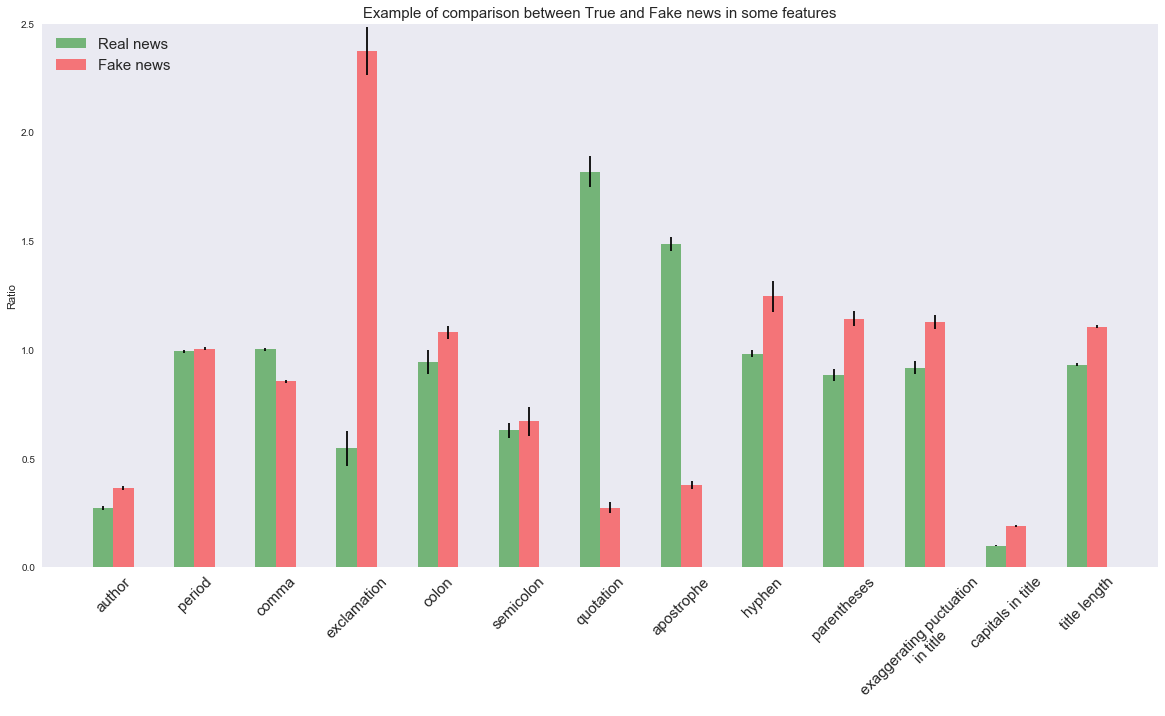

In [29]:
# Setting the positions and width for the barspos = [x+1 for x in range(feature_bar_df.shape[0])]
width = 0.25
pos = [x for x in range(feature_bar_df.shape[0])]
# Plotting the bars
fig, ax = plt.subplots(figsize=(20,10))

# Create a bar with pre_score data,
# in position pos,
c = (x for x in ['green','red'])
for x in ['Real_news', 'Fake_news']:
    plt.bar(pos, feature_bar_df[x+'_mean'], width = width, color = next(c), alpha=0.5, yerr = feature_bar_df[x+'_std'])
    pos = [p + width for p in pos]


# Set the y axis label
ax.set_ylabel('Ratio')
# Set the chart's title
ax.set_title('Example of comparison between True and Fake news in some features', fontsize = 15)

# Set the position of the x ticks
ax.set_xticks([p - 1.5*width for p in pos])

# Set the labels for the x ticks
x_labels = ['author','period','comma','exclamation','colon','semicolon','quotation','apostrophe','hyphen',
 'parentheses', 'exaggerating puctuation\nin title','capitals in title','title length']
ax.set_xticklabels(x_labels, rotation = 45, fontsize = 15)

# Setting the x-axis and y-axis limits

plt.ylim([0, 2.5] )

# Adding the legend and showing the plot
plt.legend(['Real news', 'Fake news'], loc='upper left',fontsize = 15 )
plt.grid()
plt.show()

In [9]:
check_list = ['author','rate_cap','rate_len_title','rate_period','rate_comma','rate_exclamation','rate_quotation',
              'rate_colon','rate_semicolon','rate_quotation','rate_apostrophe','rate_hyphen','rate_parentheses']


def print_feature_comp(col):
    t = X2_df[X2_df.authenticity == 0][col].mean()
    f = X2_df[X2_df.authenticity == 1][col].mean()
    r = f/t
    print("the " + col +  " in the title of true news is {} and that of fake news is {}, the ratio of f/t is {}".format(t,f,r))
        
for col in check_list:
    print_feature_comp(col)

    
# Make a bar graph with them, and feature scale them!

the author in the title of true news is 0.2713920817369093 and that of fake news is 0.36609829488465395, the ratio of f/t is 1.3489645406808661
the rate_cap in the title of true news is 0.09973786082716947 and that of fake news is 0.1900582488284762, the ratio of f/t is 1.905577754046863
the rate_len_title in the title of true news is 0.9318556703949031 and that of fake news is 1.1070351255381934, the ratio of f/t is 1.1879899009135744
the rate_period in the title of true news is 0.9943207853033994 and that of fake news is 1.0060923001296673, the ratio of f/t is 1.0118387496271397
the rate_comma in the title of true news is 1.002596970391596 and that of fake news is 0.8550473624655096, the ratio of f/t is 0.8528325815023596
the rate_exclamation in the title of true news is 0.5469484653562496 and that of fake news is 2.3751780247215315, the ratio of f/t is 4.342599303527586
the rate_quotation in the title of true news is 1.820188320310964 and that of fake news is 0.27410720002949346, th

In [19]:
# validation test & Learning curve

def valid_test(model, param, param_candidates):
    
#     candidates = np.logspace(-7, 7, 10) # for alpha, C 
#     candidates = [1,2,3,4,5,6,7,8,9,10]# for integers
    train_scores, valid_scores = validation_curve(model, X_cv_dtm, Y_cv, param, param_candidates)
    avg_ts, avg_vs = train_scores.mean(axis = 1), valid_scores.mean(axis = 1)
    sd_ts, sd_vs = train_scores.std(axis = 1), valid_scores.std(axis = 1)
    vs_max_ix = np.argmax(avg_vs)
    best = param_candidates[vs_max_ix]
    print('The best {} value for {} is {}'.format(param, model, best))
    plt.figure()
    plt.title('Validation Test')
    plt.ylabel('Scores')
    plt.xlabel('Candidate {} index'.format(param))
    plt.plot(range(10), avg_ts, label = 'Training Scores')
    plt.plot(range(10), avg_vs, label = 'Cross validation Scores')
    plt.legend(loc = 'best')
    return best

def Learning_curve(model):
    train_sizes = [50,100,150,200,250,300,350,400]
    train_sizes, train_scores, test_scores = learning_curve(model, X_train_dtm, Y_train, train_sizes=train_sizes)   
    train_scores_mean, test_scores_mean = train_scores.mean(axis = 1), test_scores.mean(axis = 1)
    train_scores_std, test_scores_std = train_scores.std(axis = 1), test_scores.std(axis = 1)
    plt.figure()
    plt.title('Learning curve')
    plt.ylabel('Scores')
    plt.xlabel('Training Set')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc = 'best')
    plt.show()

# Method 1: Use CountVectorizer to generate features

In [5]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer(analyzer = 'word', ngram_range=(2, 2))

In [6]:
# learn training data vocabulary, then use it to create a document-term matrix
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [23]:
X_train.head(n=30)

1488    (CNN) Baby simulator programs, designed to tea...
2556    (Before It's News)\n\n(NaturalHealth365) A rec...
2461    By Paul Craig Roberts\n\nThe October 5 employm...
674     Thousands of tourists had to evacuate two isla...
1784    The SS Minden, a German cargo ship scuttled in...
855     The Crisco Blimp may have just hit peak stupid...
447     Donald Trump addressed the Boy Scouts of Ameri...
1050    Story highlights President Vladimir Putin says...
1222    “Trump Village” is the new name of an 80 perce...
1812    WATCH THIS VIDEO BELOW\n\nThe legal team of Vi...
2283    Story by Maureen O'Hare, video by Francesca Ch...
294     It gets truly troublesome when you are comfort...
588     NEW YORK -- CBS News has been recognized by th...
1053    The already crowded smart speaker space may ju...
1333    (CNN) Two of the biggest voices in the transge...
1055    HUNTSVILLE, Texas — A Texas prisoner was execu...
1804    Tensions Escalate Between India And China In R...
425     Subscr

In [7]:
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)
X_cv_dtm = vect.transform(X_cv)

In [14]:
X_train_dtm

<1537x482211 sparse matrix of type '<class 'numpy.int64'>'
	with 972403 stored elements in Compressed Sparse Row format>

The best C value for LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False) is 2782.559402207126


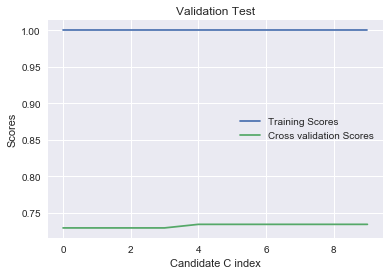

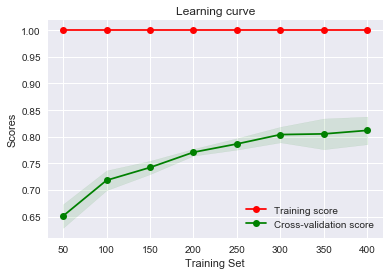

Train score is 0.9993493819128172
Test score is 0.8344155844155844


In [11]:
# Logistic Regression

best_C = valid_test(LogisticRegression(), "C", np.logspace(3, 4, 10))
LR = LogisticRegression(C = best_C)
# LR = LogisticRegression()
Learning_curve(LR)
LR.fit(X_train_dtm, Y_train)
Y_test_pred_LR = LR.predict(X_test_dtm)
print('Train score is {}'.format(LR.score(X_train_dtm, Y_train)))
print('Test score is {}'.format(LR.score(X_test_dtm, Y_test)))

# polynomial_features = PolynomialFeatures(degree=2,include_bias=False)
# pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", LR)])
# Learning_curve(pipeline)
# # Learning_curve(LR)

# pipeline.fit(X_train, Y_train)
# Y_test_pred_LR = pipeline.predict(X_test)
# print('Train score is {}'.format(pipeline.score(X_train, Y_train)))
# print('Cross validation score is {}'.format(pipeline.score(X_cv, Y_cv)))

The best alpha value for MLPClassifier(activation='relu', alpha=0.10000000000000001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False) is 1e-05


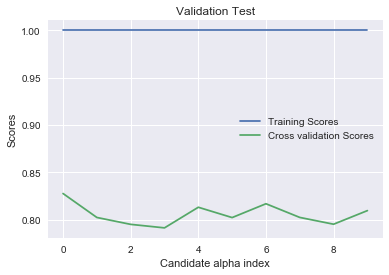

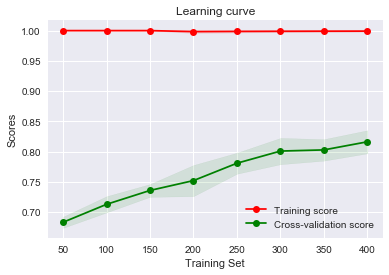

train score is 0.9980842911877394
test score is 0.8568019093078759


In [20]:
# Neural networking (MLP)
best_alpha = valid_test(MLPClassifier(), 'alpha', np.logspace(-5, -1, 10))
MLP = MLPClassifier(alpha=best_alpha, hidden_layer_sizes=(10, 10, 10), random_state=1, max_iter=200)
# MLP = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(12, 12, 12), random_state=1, max_iter=200)
MLP.fit(X_train_dtm, Y_train)
Learning_curve(MLP)
Y_test_pred_MLP = MLP.predict(X_test_dtm)

print('train score is {}'.format(MLP.score(X_train_dtm, Y_train)))
print('test score is {}'.format(MLP.score(X_test_dtm, Y_test)))

# polynomial_features = PolynomialFeatures(degree=2,include_bias=False)
# pipeline = Pipeline([("polynomial_features", polynomial_features), ("MLP_Classifier", MLP)])
# pipeline.fit(X_train, Y_train)
# Learning_curve(pipeline)
# Y_test_pred_MLP = MLP.predict(X_test)

# print('train score is {}'.format(pipeline.score(X_train, Y_train)))
# print('cross validation score is {}'.format(pipeline.score(X_cv, Y_cv)))

The best alpha value for MLPClassifier(activation='relu', alpha=100000.0, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False) is 0.0001291549665014884


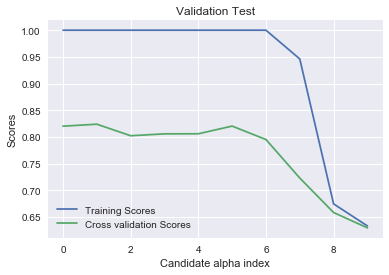

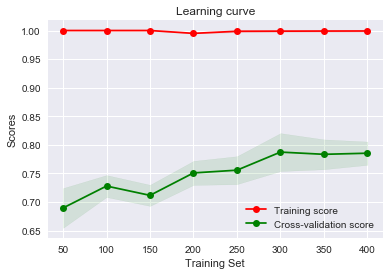

train score is 0.9980842911877394
test score is 0.8687350835322196


In [13]:
# Neural networking (MLP)
best_alpha = valid_test(MLPClassifier(), 'alpha', np.logspace(-10, 5, 10))
MLP = MLPClassifier(alpha=best_alpha, hidden_layer_sizes=(7, 7, 7), random_state=1, max_iter=300)
# MLP = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(12, 12, 12), random_state=1, max_iter=200)
MLP.fit(X_train_dtm, Y_train)
Learning_curve(MLP)
Y_test_pred_MLP = MLP.predict(X_test_dtm)

print('train score is {}'.format(MLP.score(X_train_dtm, Y_train)))
print('test score is {}'.format(MLP.score(X_test_dtm, Y_test)))

The best gamma value for SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0031622776601683794,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) is 0.0006812920690579615
The best C value for SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.00068129206905796151,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) is 4.641588833612778


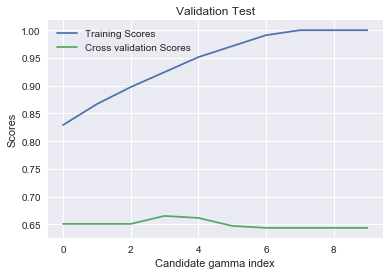

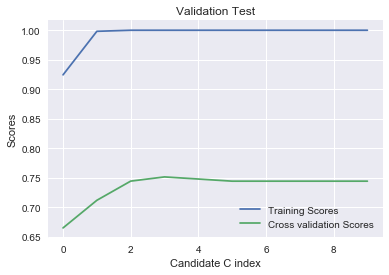

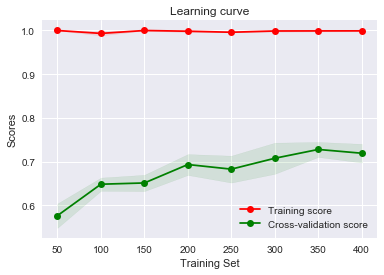

train score is 0.9980842911877394
test score is 0.8138424821002387


In [19]:
# Support Vector Machines
best_gamma = valid_test(SVC(), "gamma", np.logspace(-3.5, -2.5, 10))
best_C = valid_test(SVC(gamma = best_gamma), "C", np.logspace(0, 1, 10))
svm = SVC(C = best_C, gamma = best_gamma)
# svm = SVC(C = 3.6, gamma = 0.0016)
svm.fit(X_train_dtm, Y_train)
Learning_curve(svm)
Y_test_pred_svm = svm.predict(X_test_dtm)
print('train score is {}'.format(svm.score(X_train_dtm, Y_train)))
print('test score is {}'.format(svm.score(X_test_dtm, Y_test)))

The best n_estimators value for RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=11, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False) is 9


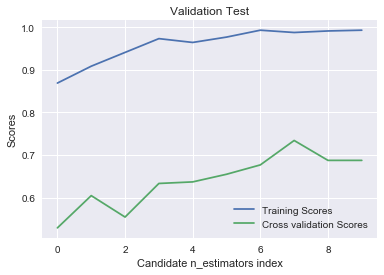

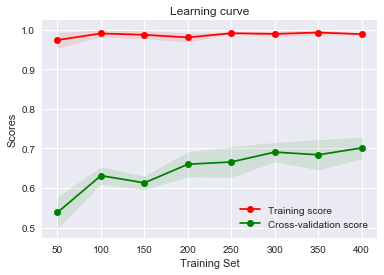

Train score is 0.9904214559386973
test score is 0.7852028639618138


In [24]:
# RandomForestClassifier
best_estimator = valid_test(RandomForestClassifier(), "n_estimators", [x for x in range(2,12)])
RF = RandomForestClassifier(n_estimators=best_estimator)
Learning_curve(RF)
RF.fit(X_train_dtm, Y_train)
Y_test_pred_RF = RF.predict(X_test_dtm)
print('Train score is {}'.format(RF.score(X_train_dtm, Y_train)))
print('test score is {}'.format(RF.score(X_test_dtm, Y_test)))

The best alpha value for MultinomialNB(alpha=100.0, class_prior=None, fit_prior=True) is 0.21544346900318778


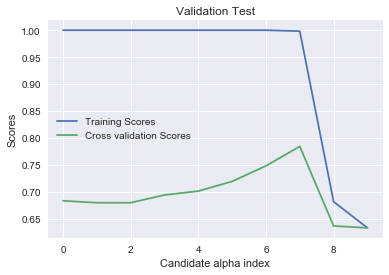

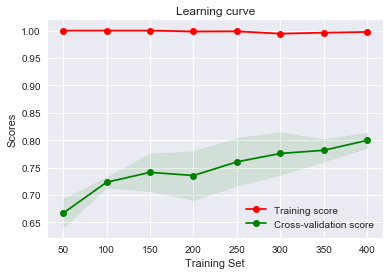

Train score is 0.9865900383141762
test score is 0.8448687350835322


In [45]:
#naive_bayes

best_alpha = valid_test(MultinomialNB(), "alpha", np.logspace(-10, 2, 10))
nb = MultinomialNB(alpha = best_alpha)
Learning_curve(nb)
nb.fit(X_train_dtm, Y_train)
Y_test_pred_RF = nb.predict(X_test_dtm)
print('Train score is {}'.format(nb.score(X_train_dtm, Y_train)))
print('test score is {}'.format(nb.score(X_test_dtm, Y_test)))    

# Method 2: use TF-IDF to generate features

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

In [25]:
tfidf.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [26]:
X_train_dtm = tfidf.transform(X_train)
X_test_dtm = tfidf.transform(X_test)
X_cv_dtm = tfidf.transform(X_cv)

The best C value for LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False) is 4641588.833612782


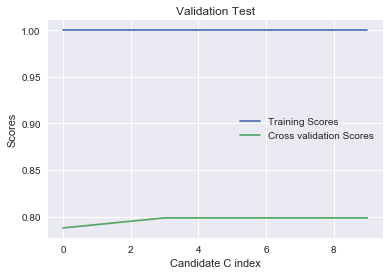

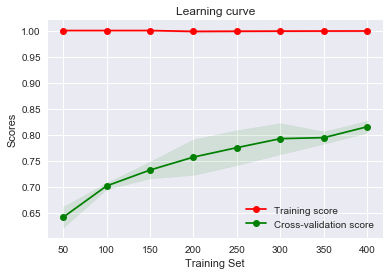

Train score is 0.9980842911877394
Test score is 0.863961813842482


In [29]:
# Logistic Regression

best_C = valid_test(LogisticRegression(), "C", np.logspace(5, 10, 10))
LR = LogisticRegression(C = best_C)
# LR = LogisticRegression()
Learning_curve(LR)
LR.fit(X_train_dtm, Y_train)
Y_test_pred_LR = LR.predict(X_test_dtm)
print('Train score is {}'.format(LR.score(X_train_dtm, Y_train)))
print('Test scocre is {}'.format(LR.score(X_test_dtm, Y_test)))

# polynomial_features = PolynomialFeatures(degree=2,include_bias=False)
# pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", LR)])
# Learning_curve(pipeline)
# # Learning_curve(LR)

# pipeline.fit(X_train, Y_train)
# Y_test_pred_LR = pipeline.predict(X_test)
# print('Train score is {}'.format(pipeline.score(X_train, Y_train)))
# print('Cross validation score is {}'.format(pipeline.score(X_cv, Y_cv)))

/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged y

The best alpha value for MLPClassifier(activation='relu', alpha=0.10000000000000001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False) is 0.1


/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged y

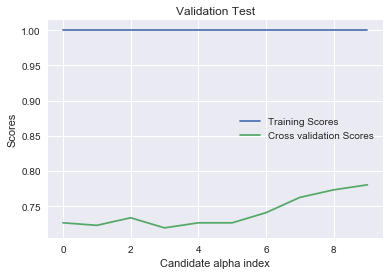

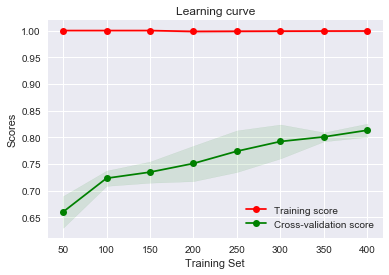

train score is 0.9980842911877394
test score is 0.8663484486873508


In [30]:
# Neural networking (MLP)
best_alpha = valid_test(MLPClassifier(), 'alpha', np.logspace(1, 5, 10))
MLP = MLPClassifier(alpha=best_alpha, hidden_layer_sizes=(10, 10, 10), random_state=1, max_iter=200)
# MLP = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(12, 12, 12), random_state=1, max_iter=200)
MLP.fit(X_train_dtm, Y_train)
Learning_curve(MLP)
Y_test_pred_MLP = MLP.predict(X_test_dtm)

print('train score is {}'.format(MLP.score(X_train_dtm, Y_train)))
print('test score is {}'.format(MLP.score(X_test_dtm, Y_test)))

# polynomial_features = PolynomialFeatures(degree=2,include_bias=False)
# pipeline = Pipeline([("polynomial_features", polynomial_features), ("MLP_Classifier", MLP)])
# pipeline.fit(X_train, Y_train)
# Learning_curve(pipeline)
# Y_test_pred_MLP = MLP.predict(X_test)

# print('train score is {}'.format(pipeline.score(X_train, Y_train)))
# print('cross validation score is {}'.format(pipeline.score(X_cv, Y_cv)))

The best gamma value for SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=100000.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) is 1e-05
The best C value for SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1.0000000000000001e-05,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) is 1000000.0


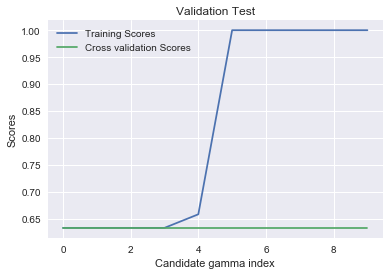

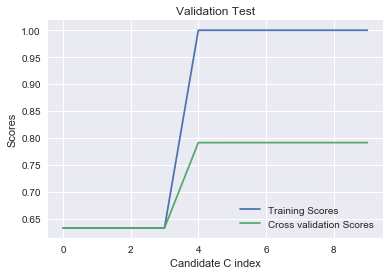

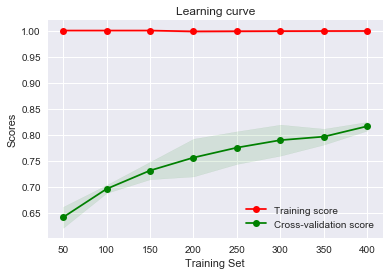

train score is 0.9980842911877394
test score is 0.8591885441527446


In [35]:
# Support Vector Machines
best_gamma = valid_test(SVC(), "gamma", np.logspace(-5, 5, 10))
best_C = valid_test(SVC(gamma = best_gamma), "C", np.logspace(1, 10, 10))
svm = SVC(C = best_C, gamma = best_gamma)
# svm = SVC(C = 3.6, gamma = 0.0016)
svm.fit(X_train_dtm, Y_train)
Learning_curve(svm)
Y_test_pred_svm = svm.predict(X_test_dtm)
print('train score is {}'.format(svm.score(X_train_dtm, Y_train)))
print('test score is {}'.format(svm.score(X_test_dtm, Y_test)))

The best n_estimators value for RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=11, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False) is 7


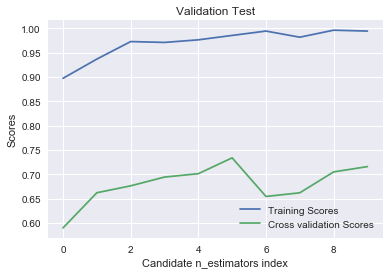

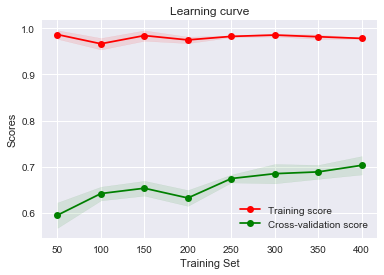

Train score is 0.9837164750957854
test score is 0.7708830548926014


In [36]:
# RandomForestClassifier
best_estimator = valid_test(RandomForestClassifier(), "n_estimators", [x for x in range(2,12)])
RF = RandomForestClassifier(n_estimators=best_estimator)
Learning_curve(RF)
RF.fit(X_train_dtm, Y_train)
Y_test_pred_RF = RF.predict(X_test_dtm)
print('Train score is {}'.format(RF.score(X_train_dtm, Y_train)))
print('test score is {}'.format(RF.score(X_test_dtm, Y_test)))

The best alpha value for MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) is 0.1


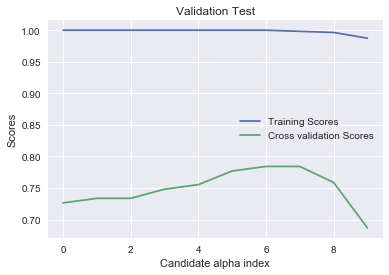

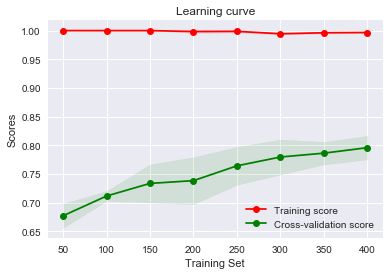

Train score is 0.9885057471264368
test score is 0.847255369928401


In [23]:
#naive_bayes

best_alpha = valid_test(MultinomialNB(), "alpha", np.logspace(-3, 0, 10))
nb = MultinomialNB(alpha = best_alpha)
Learning_curve(nb)
nb.fit(X_train_dtm, Y_train)
Y_test_pred_nb = nb.predict(X_test_dtm)
print('Train score is {}'.format(nb.score(X_train_dtm, Y_train)))
print('test score is {}'.format(nb.score(X_test_dtm, Y_test)))  